# Python TextAnalyzer developed using Test Driven Development TDD

## The TextAnalyzer class accepts 3 types on input:
- Website url starting with http
- Text file ending with txt
- Plan Text 

## Methods or functions:
- __init__()
  A constructor
- discover() 
  Finds if the input is url, txt or plan text and open the input as per file type
- set_context_to_tag()
  Parses the webwite using url and parser BeautifulSoup
- reset_content()
  Set _content back to orginal as retrieved from source
- _words()
  The list of words in the document
- common_words()
  Count of words
- char_distribution()
  The letters used and the count
- plot_common_words()
  Setting for the words and frequency to be used in a plot
- plot_char_distribution()
  Setting for the characters and frequency to be used in a plot
  
## Properties (data from the source input)
- words
  A list of words
- avg_word_length
  Average word length
- word_count
  Word Count
- distinct_word_count
  Distinct Word Count
- positivity
  -Uses Negative and Postive word list and determines the positivity of the input source

In [1]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string

#create your class here
class TextAnalyzer:
    """ Python TextAnalyzer developed using Test Driven Development TDD"""
    def __init__(self, src, src_type=None):
        """
        The TextAnalyzer class accepts 3 types on input:
        Website url starting with http
        Text file ending with txt
        Plan Text
        """
        self._src = src
        self._src_type = src_type
        self._orig_content = None
        self._content = None

        self.discover()


    def discover(self):
        """Finds if the input is url, txt or plan text and open the input as per file type"""
        if self._src.startswith('http'):
            self._src_type = 'url'
            
            headers = {'user-agent': 'TextAnalyzer'}
            req = requests.get(self._src, headers=headers)
            self._content = self._orig_content = req.text
        
        elif self._src.endswith('txt'):
            self._src_type = 'path'
            with open(self._src, 'r') as f:
                self._content = f.read()
                
        else:
            self._src_type = 'text'
            self._content = self._src                                        
    
    def set_content_to_tag(self, tag, tag_id):
        """Parses the webwite using url and parser BeautifulSoup"""
        try:
            soup = BeautifulSoup(self._content, 'html.parser')
            self._content = soup.find(tag, {'id': tag_id}).get_text()
        except ValueError:
            print("Error reading webpage with BeautifulSoup tag {tag} and tag_id {tag_id}")

    def reset_content(self):
        """Set _content back to orginal as retrieved from source"""
        self._content = self._orig_content
        return self._content

    def _words(self, casesensitive=False):
        """A list of words"""
        if casesensitive is False:
            words = [word.strip(string.punctuation).upper() 
                     for word in self._content.split()] 
        else:
            words = [word.strip(string.punctuation) 
                     for word in self._content.split()]
        return words  

    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        """The list of words with count"""
        _word_list = []
        if casesensitive is False:
            _word_list = [w.upper() for w in self.words if (len(w) >= minlen) & (len(w) <= maxlen)]
        else:
            _word_list = [w for w in self.words if (len(w) >= minlen) & (len(w) <= maxlen)]
        cnt = Counter(_word_list)
        return cnt.most_common(count)
    
    def char_distribution(self, casesensitive=False, letters_only=False):
        """The letters used and the count"""
        chars = []
        # Remove any non aplha letters
        chars_alpha = re.compile('[^a-zA-Z]').sub('', self._content.rstrip('\n'))

        if casesensitive and letters_only:
            chars = [char.strip(string.punctuation) for char in chars_alpha]
        elif casesensitive and not letters_only:           
            chars = [char for char in self._content]
        elif not casesensitive and letters_only:
            chars = [char.strip(string.punctuation).upper() for char in chars_alpha]
        elif not casesensitive and not letters_only:
            chars = [char.upper() for char in self._content]
            
        cnt_chars = Counter(chars)
        char_dist = cnt_chars.most_common() 
        char_dist_sorted = sorted(char_dist, key=lambda x: x[1], reverse=False)
        return char_dist

    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        """Setting for the words and frequency to be used in a plot"""
 
        df_cw = pd.DataFrame(self.common_words(minlen, maxlen, count, casesensitive))
    
        df_cw.columns = ['Word', 'Count']
        df_cw.index = df_cw['Word']

        plt_words = df_cw.plot(kind='bar',
                               title='Common Words',
                               figsize=(14,3),
                               width=.8,
                               fontsize=16)
        plt_words.set_ylabel('Word', fontsize=20)
        plt_words.set_xlabel('Count', fontsize=20)
        plt_words.grid(True)
        
    def plot_char_distribution(self, casesensitive=False, letters_only=False):
        """Setting for the characters and frequency to be used in a plot"""
 
        df_cd = pd.DataFrame(self.char_distribution(casesensitive, letters_only))
    
        df_cd.columns = ['Character', 'Count']
        df_cd.index = df_cd['Character']

        plt_chars = df_cd.plot(kind='bar',
                               title='Character Distribution',
                               figsize=(14, 4),
                               width=.8,
                               fontsize=16)
        plt_chars.set_ylabel('Character', fontsize=20)
        plt_chars.set_xlabel('Count', fontsize=20)
        plt_chars.grid(True)

    @property
    def words(self):
        """A list of words"""
        return self._words()
    
    @property
    def avg_word_length(self):
        """Average word length"""
        _avg_word_length = sum([len(w) for w in self.words]) / len(self._words())
        return round(_avg_word_length, 2)
    
    @property
    def word_count(self):
        """Word Count"""
        return len(self._words())
    
    @property
    def distinct_word_count(self):
        """Distinct Word Count"""
        return len(set(self._words()))
    
    @property
    def positivity(self):
        """Negative and Postive word list and determines the positivity of the input source"""
        with open('positive.txt', 'r') as _f:
            list_of_lines = _f.readlines() 
            positive_words = []
        for word in list_of_lines:
            positive_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in list_of_lines]


        with open('negative.txt', 'r') as _f:
            list_of_lines = _f.readlines()
            negative_words = []
        for word in list_of_lines:
            negative_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in list_of_lines]

        matches = []
        tally = 0
        positive = 0
        negative = 0
        # Comapring overall words in _content with positive and negative list
        for w in self.words:
            for p in positive_words:
                if w == p:
                    positive += 1
                    tally += 1
                    matches.append((w, p, tally))
            for n in negative_words:
                if w == n:
                    negative += 1
                    tally -= 1
                    matches.append((w, n, tally))


        _positivity = round(tally / self.word_count * 1000)

        return _positivity


    



In [2]:
import unittest

url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''

class TestTextAnalyzer(unittest.TestCase):
    def test_discover_url(self):
        ta = TextAnalyzer(url)
        self.assertEqual(ta._src_type, 'url')
    def test_discover_path(self):
        ta = TextAnalyzer(path)
        self.assertEqual(ta._src_type, 'path')
    def test_discover_text(self):
        ta = TextAnalyzer(text)
        self.assertEqual(ta._src_type, 'text')
    def test_set_content_to_tag(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        self.assertEqual(ta._content[0:25], '\n\nAddress by Bill Clinton')
    def test_reset_content(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        ta.reset_content()
        self.assertEqual(ta._content[0], '<')
    def test_common_words(self):
        ta = TextAnalyzer(path, src_type='path')
        common_words = ta.common_words(minlen=5, maxlen=10)
        liz = common_words[0]
        self.assertEqual(liz[0],'ELIZABETH')
    def test_avg_word_length(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.avg_word_length, 4.16)
    def test_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.word_count, 45)
    def test_distinct_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.distinct_word_count, 38)
    def test_char_distribution(self):
        ta = TextAnalyzer(text, src_type='text')
        char_dist = ta.char_distribution(letters_only=True)
        self.assertEqual(char_dist[1][1], 20)
    def test_positivity(self):
        ta = TextAnalyzer(text, src_type='text')
        positivity = ta.positivity
        self.assertEqual(positivity, -44)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestTextAnalyzer)
unittest.TextTestRunner().run(suite)

...........
----------------------------------------------------------------------
Ran 11 tests in 13.453s

OK


<unittest.runner.TextTestResult run=11 errors=0 failures=0>

## Plots
You should also run the cell below to make sure your plot methods work. They should produce plots that look like the images found at:
* <a href="character-distribution.png" target="image_win">character-distribution.png</a>
* <a href="common-words.png" target="image_win">common-words.png</a>

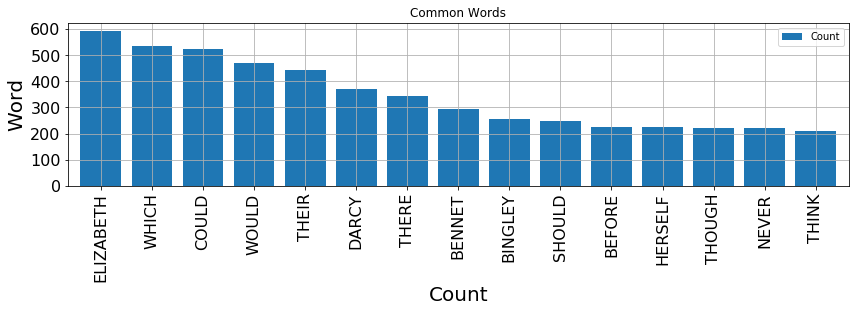

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
ta.plot_common_words(minlen=5, maxlen=10, count=15, casesensitive=False)

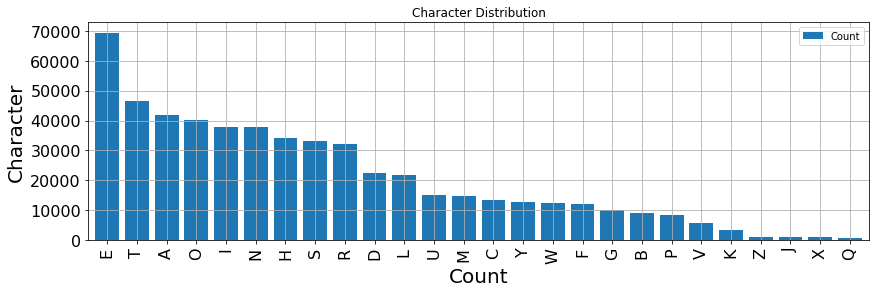

In [4]:
ta.plot_char_distribution(letters_only=True)

## Exam: Using the TextAnalyzer

### Question 1
How many words are in the text of William Henry Harrison's 1841 inaugaral address?
* The address can be found at https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm.
* Its contents are in a div tag with the id 'content-main'.

In [5]:
ta = TextAnalyzer('https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm')

ta.set_content_to_tag(tag='div', tag_id='content-main')

print("William Henry Harrison's 1841 inaugaral address has ", ta.word_count, " words")

# William Henry Harrison's 1841 inaugaral address has 8430 words

William Henry Harrison's 1841 inaugaral address has  8430  words


### Question 2
What is the least common letter in pride-and-prejudice.txt?

In [6]:
ta = TextAnalyzer('pride-and-prejudice.txt')

least_common_letter = sorted(ta.char_distribution(letters_only=True), key=lambda x:x[1])[0][0]

print("The the least common letter in pride-and-prejudice.txt is ", least_common_letter)

# The the least common letter in pride-and-prejudice.txt is  Q

The the least common letter in pride-and-prejudice.txt is  Q


### Question 3
What is the most common 11-letter word in pride-and-prejudice.txt?  

In [7]:
ta = TextAnalyzer('pride-and-prejudice.txt')

most_common_11_letter_word = ta.common_words(minlen=11, maxlen=100, count=3)[0][0]

print("The most common 11-letter word in pride-and-prejudice.txt is ", most_common_11_letter_word)

# The most common 11-letter word in pride-and-prejudice.txt is  NETHERFIELD

The most common 11-letter word in pride-and-prejudice.txt is  NETHERFIELD


### Question 4
What is the average word length in pride-and-prejudice.txt?

In [8]:
ta = TextAnalyzer('pride-and-prejudice.txt')

print("The average word length in pride-and-prejudice.txt is ", ta.avg_word_length)

# The average word length in pride-and-prejudice.txt is  4.43

The average word length in pride-and-prejudice.txt is  4.43


### Question 5
How many distinct words are there in pride-and-prejudice.txt?

In [9]:
ta = TextAnalyzer('pride-and-prejudice.txt')

print("The distinct words are there in pride-and-prejudice.txt is ", ta.distinct_word_count)

# The distinct words are there in pride-and-prejudice.txt is  6839

The distinct words are there in pride-and-prejudice.txt is  6839


### Question 6
How many words, ignoring case, are used only once in pride-and-prejudice.txt?

In [10]:
ta = TextAnalyzer('pride-and-prejudice.txt')

count_singles = 0

for word, length in ta.common_words(count=None):
    if length == 1:
        count_singles += 1

print("Words ignoring case are used only once in pride-and-prejudice.txt" , count_singles)

# Words ignoring case are used only once in pride-and-prejudice.txt 2886

Words ignoring case are used only once in pride-and-prejudice.txt 2886


### Question 7
How many distinct words in pride-and-prejudice.txt have less than five characters, at least one character of which is a capital 'A'.

In [11]:
ta = TextAnalyzer('pride-and-prejudice.txt')

A_list = []

for word in ta.common_words(minlen=1, maxlen=5, count=None, casesensitive=False):
    
    if re.search('A', word[0]):
        A_list.append(word[0])
        
print(A_list)
print("Distinct words have less than five characters, at least one character of which is a capital 'A' are: ", len(A_list))

# Distinct words have less than five characters, at least one character of which is a capital 'A' are:  480

['AND', 'A', 'WAS', 'THAT', 'AS', 'HAD', 'HAVE', 'AT', 'ALL', 'WHAT', 'SAID', 'DARCY', 'AN', 'ARE', 'AM', 'THAN', 'ANY', 'JANE', 'HAS', 'CAN', 'AFTER', 'MAY', 'LADY', 'AGAIN', 'MAKE', 'SHALL', 'SAY', 'DEAR', 'MAN', 'GREAT', 'LYDIA', 'DAY', 'MADE', 'ABOUT', 'LAST', 'MANY', 'AWAY', 'WAY', 'SAW', 'CAME', 'HEARD', 'HAPPY', 'TAKE', 'AUNT', 'PLACE', 'HEAR', 'ADDED', 'SAME', 'SPEAK', 'LUCAS', 'LEAST', 'EACH', 'PART', 'LEAVE', 'BEGAN', 'FAR', 'PARTY', 'MEANS', 'WOMAN', 'GAVE', 'ABLE', 'WALK', 'IDEA', 'HALF', 'HEART', 'WANT', 'MARRY', 'BACK', 'DARE', 'READ', 'ASKED', 'MARY', 'SAT', 'NEAR', 'GLAD', 'STAY', 'YEARS', 'CARE', 'MEAN', 'DEAL', 'ALSO', 'USUAL', 'BALL', 'NAME', 'TALK', 'DANCE', 'ASK', 'HEAD', 'TAKEN', 'REAL', 'CASE', 'DAYS', 'AIR', 'ALONE', 'EQUAL', 'ALLOW', 'YEAR', 'MEANT', 'EARLY', 'CALL', 'FACE', 'TABLE', 'PAIN', 'PRAY', 'AGO', 'AMONG', 'BEAR', 'EASY', 'HAND', 'MATCH', 'LARGE', 'SAKE', 'FEAR', 'SMALL', 'PARK', 'FAIR', 'ABOVE', 'ELIZA', 'MADAM', 'VAIN', 'READY', 'FANCY', 'LATE', 'THA

### Question 8
A palindrome is a word spelled the same forwards and backwards, like BOB. How many distinct palindromes are there in pride-and-prejudice.txt.
* Only include words with at least three letters.

In [12]:
ta = TextAnalyzer('pride-and-prejudice.txt')

list_palindromes = []

for word in ta.common_words(minlen=3, maxlen=100, count=None, casesensitive=False):
    
    if word[0]  == word[0][::-1]:
        list_palindromes.append(word[0])

print("The number of Palindromes with at least 3 letters in pride-and-prejudice.txt are: ", len(list_palindromes))

# The number of Palindromes with at least 3 letters in pride-and-prejudice.txt are:  9

The number of Palindromes with at least 3 letters in pride-and-prejudice.txt are:  9


### Question 9
What is the positivity rating of 'pride-and-prejudice.txt'

In [13]:
ta = TextAnalyzer('pride-and-prejudice.txt')

ta.positivity

print("The the positivity rating of 'pride-and-prejudice.txt is :",  ta.positivity)

The the positivity rating of 'pride-and-prejudice.txt is : 11


### Question 10
Which of the following addresses (originally from http://www.inaugural.senate.gov/swearing-in/addresses) has the lowest positivity rating?
1. https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm
1. https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm
1. https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm
1. https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm

Note the contents of the addresses are in a div tag with the id 'content-main'.

In [14]:
list_positivity  = []

url = 'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm'
ta = TextAnalyzer(url)
ta.set_content_to_tag(tag='div', tag_id='content-main')
list_positivity.append((url, ta.positivity))
print(list_positivity[0])


url = 'https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm'
ta = TextAnalyzer(url)
ta.set_content_to_tag(tag='div', tag_id='content-main')
list_positivity.append((url , ta.positivity))
print(list_positivity[1])


url = 'https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm'
ta = TextAnalyzer(url)
ta.set_content_to_tag(tag='div', tag_id='content-main')
list_positivity.append((url , ta.positivity))
print(list_positivity[2])

url = 'https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm'
ta = TextAnalyzer(url)
ta.set_content_to_tag(tag='div', tag_id='content-main')
list_positivity.append((url , ta.positivity))
print(list_positivity[3])

sorted_list = sorted(list_positivity, key = lambda x: x[1], reverse=False)

print("The url: ", sorted_list[0][0], " has the lowest positivity of: ", sorted_list[0][1])

('https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm', 36)
('https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm', 44)
('https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm', 30)
('https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm', 51)
The url:  https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm  has the lowest positivity of:  30
